# Analyze Ice Caps

This notebook analyzes the 10 largest ice caps in regions 3, 4, 5, 6, 7, 8, 9, 10, and 17

In [1]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

In [2]:
region = 7

# Open region 7 glims file
region_fn = "data/glims/processed/cleaned/glims_region_" + str(region) + "_cleaned.shp"
region_7_df = gpd.read_file(region_fn)

# Open region 7 largest ice caps file
region_lg_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + ".shp"
ten_lg_region_7_df = gpd.read_file(region_lg_fn)

In [3]:
ten_lg_region_7_df

,id,area,geometry
0,7,8402.703720,"POLYGON ((18.914782 78.469039, 18.910191 78.46..."
1,708,8077.403592,"POLYGON ((24.946811 79.36035200000001, 24.9392..."
2,8,5410.102716,"POLYGON ((13.66026 78.255189, 13.660433 78.255..."
3,431,4451.165085,"POLYGON ((18.185957 77.56537, 18.185853 77.565..."
4,706,2372.805757,"POLYGON ((19.215861 79.764661, 19.215788 79.76..."
5,215,1160.308733,"POLYGON ((23.382094 77.464433, 23.422874 77.45..."
6,638,646.149091,"POLYGON ((33.482192 80.22808499999999, 33.4878..."
7,871,511.149775,"POLYGON ((21.936172 78.491522, 21.963917 78.49..."
8,200,226.928046,"POLYGON ((22.046245 77.567789, 22.04168 77.568..."
9,762,161.182697,"POLYGON ((20.493904 79.52167, 20.497456 79.520..."


In [4]:
# Open natural earth basemap TIF file
ne_fp = 'data/natural-earth/NE1_50m_SR/NE1_50M_SR.tif'
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds

In [5]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

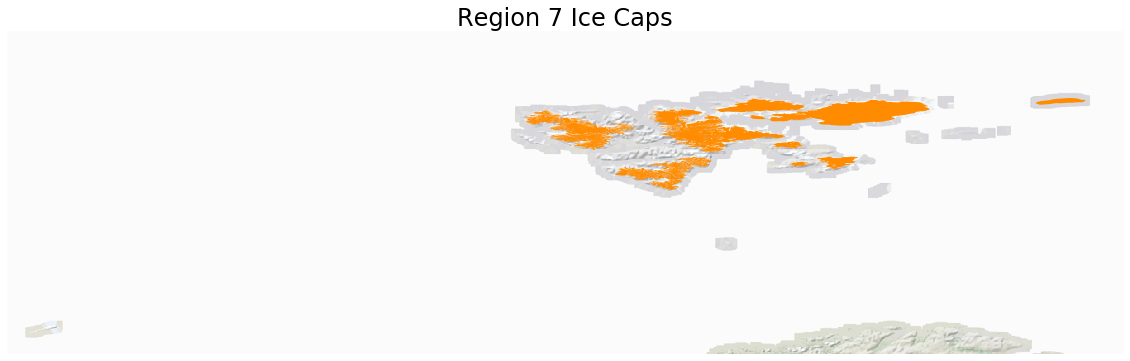

In [6]:
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 1st largest and the title and legend
ten_lg_region_7_df.plot(ax=ax, color="darkorange")
ax.set_title('Region 7 Ice Caps', fontsize=24)
ax.set_axis_off()

In [7]:
# Create a clipping polygon for Agassiz Ice Cap
# Create dataframe that holds the clipping box
jan_mayan_points = Polygon([(-9.5691, 71.5205), (-7.2620, 71.5205),
                                 (-7.2620, 70.5136), (-9.5691, 70.5136), 
                                 (-9.5691, 71.5205)])
jan_mayan_gdf = gpd.GeoDataFrame([1],
                                 geometry=[jan_mayan_points],
                                 crs={'init': 'epsg:4362'})

Text(0.5, 1, 'GLIMS Region 7 with Jan Mayan outline')

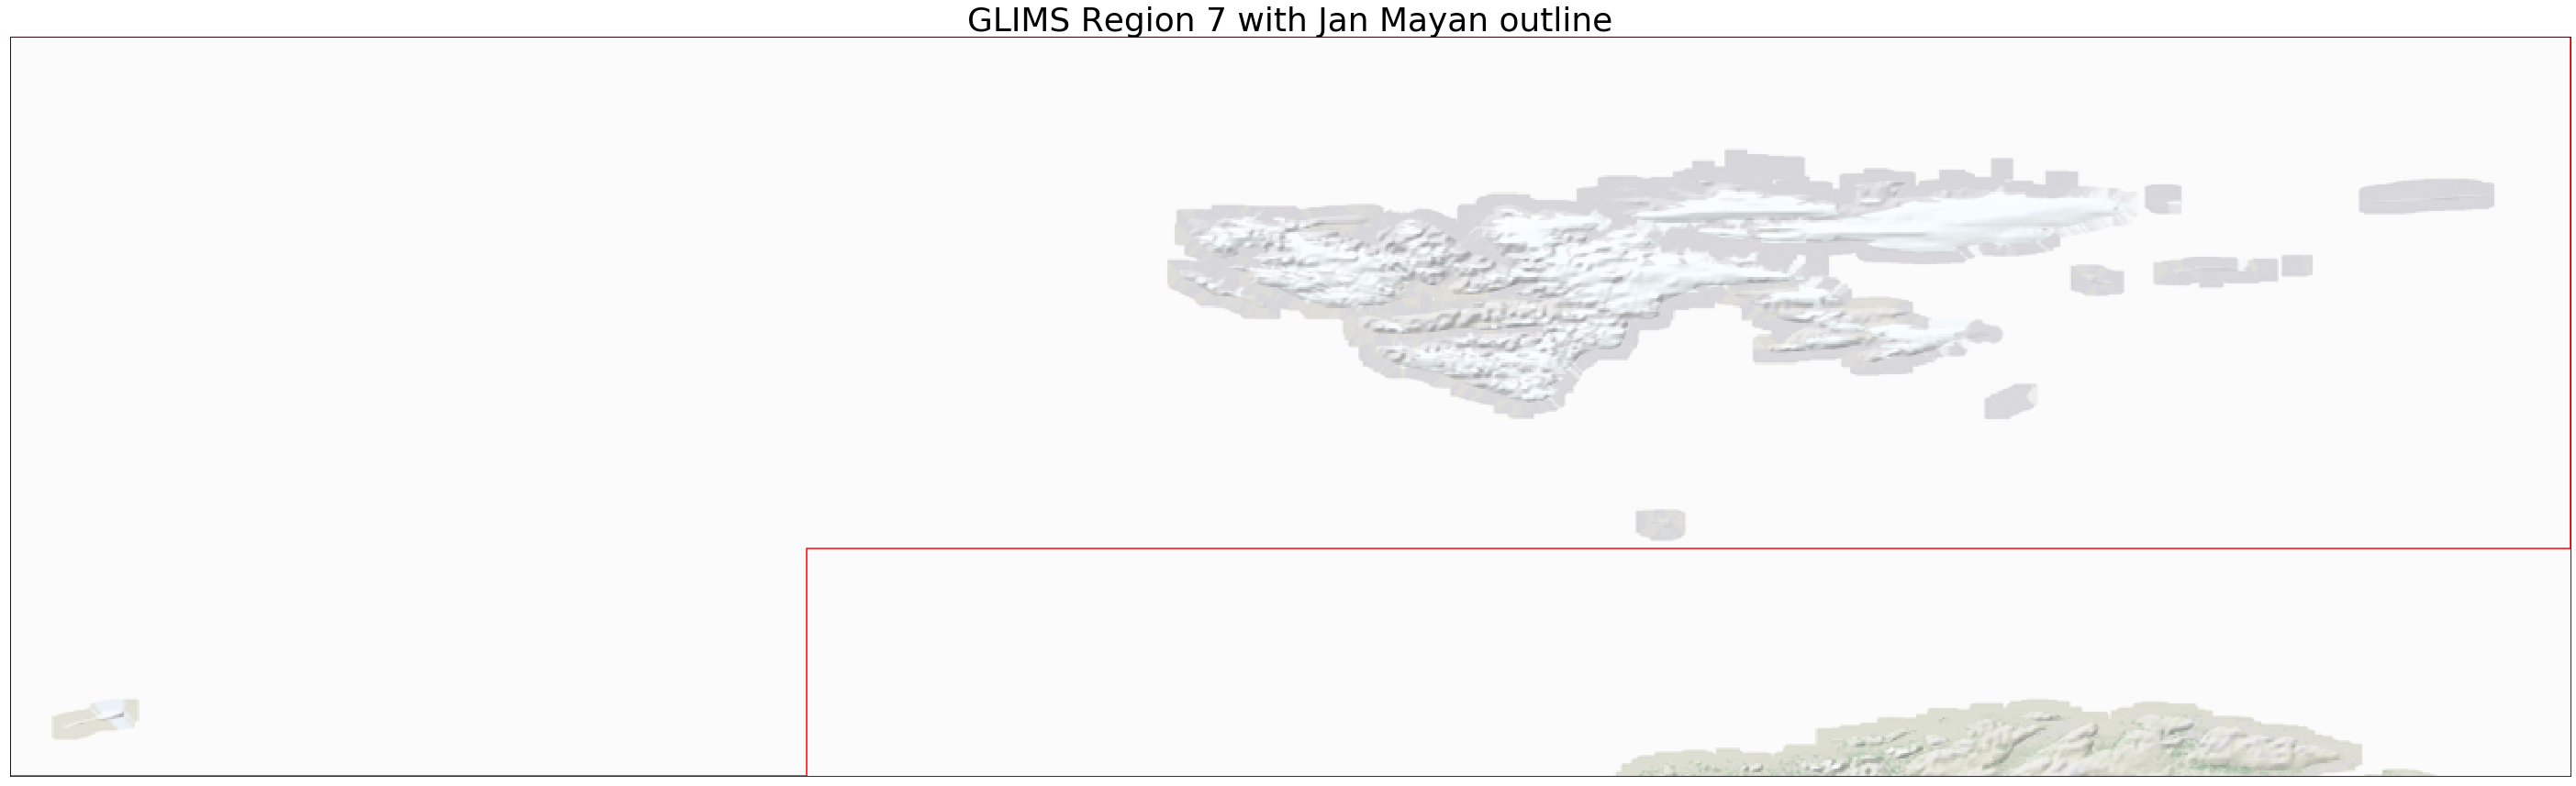

In [17]:
# Plot the jan mayan outline on top of Region 7 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax1)

#jan_mayan_gdf.boundary.plot(ax=ax1, color='red')
glacier_regions.loc[6:6].boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 7 with Jan Mayan outline", fontsize=36)

In [14]:
region_7_df.crs

{'init': 'epsg:4326'}

In [11]:
# Find the GLIMS outlines that lie within the jan mayan outline
jan_mayan_pip_mask = ws.pip(region_7_df, jan_mayan_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayan_region = region_7_df.loc[jan_mayan_pip_mask]

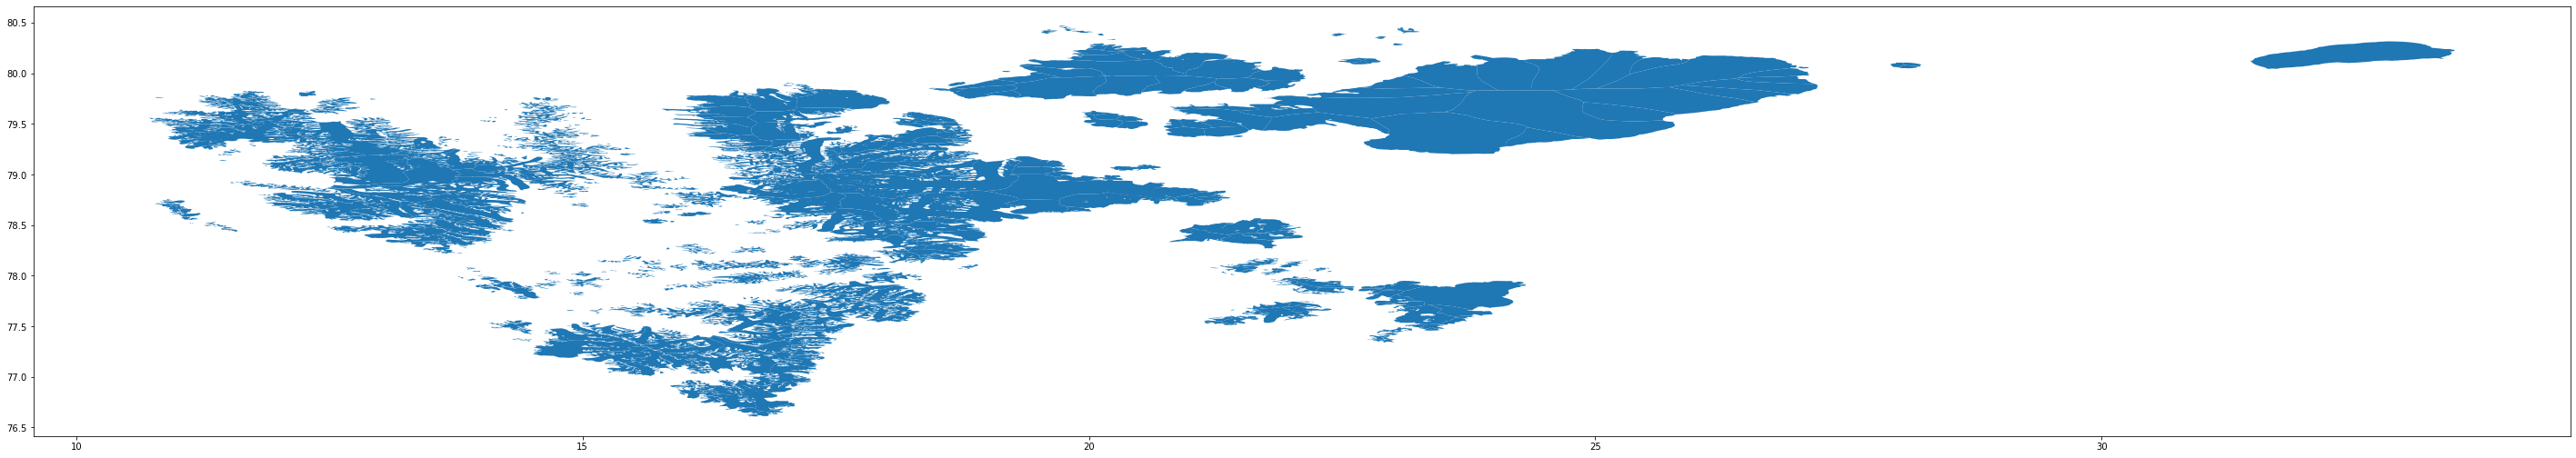

In [15]:
# Plot jan mayan area
fig, ax1 = plt.subplots(figsize=(50, 50))
#jan_mayan_region.plot(ax=ax1)
region_7_df.plot(ax=ax1)